Introduction:

In today's digital age, social media platforms have become powerful tools for businesses and individuals alike to connect, engage, and share content with a global audience. Among these platforms, Twitter stands out as a dynamic and fast-paced environment where conversations, trends, and ideas unfold in real-time. However, harnessing the full potential of Twitter requires a keen understanding of user behavior, content dynamics, and engagement trends.

In this comprehensive analysis of Twitter data, we delve into the intricate web of insights gleaned from the platform's performance metrics. Through a meticulous examination of impressions, engagements, likes, comments, shares, and more, we aim to uncover the strategies and patterns that drive success on Twitter.

From the impact of different content types to the influence of timing and seasonality, our exploration offers a valuable roadmap for navigating the Twitter landscape effectively. By dissecting the data and drawing actionable recommendations, we equip you with the knowledge to optimize your Twitter presence, enhance audience engagement, and propel your content to new heights of reach and influence.

Join us on this journey through the Twitterverse as we decode the secrets behind the tweets, retweets, and conversations that shape the digital discourse.

In [19]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [20]:
data = 'C:\\Users\\HP\\Documents\\WORKSPACE\\Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.xls'
df = pd.read_excel(data)

In [21]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

In [22]:
df.head(10)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 10:57 am,1679429829567940096,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,https://twitter.com/StanbicIBTC/status/1679429...,445.0,445.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345718.0,0.0360,NaN,16.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,9.0,9.0,1.0,0.0,7.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,2023-12-07 20:03:00,1679204777081860096,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",NaN,2961.0,2961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [23]:
df.tail()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
8524,2/18/2013 7:39 pm,303574464447270016,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/3035744...,FCMB CEO at the Stanbic IBTC sponsored BIT hub...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8525,2/18/2013 7:13 pm,303567968183390016,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/3035679...,Next event at the Stanbic IBTC sponsored BIT H...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Columns: 147 entries, Date to Tags
dtypes: float64(136), int64(1), object(10)
memory usage: 9.6+ MB


In [24]:
# Set pandas display options to show all columns without breaking
pd.set_option('display.max_columns', None)

# Calculate the sum of missing values in each column
missing_values_sum = df.isnull().sum()


In [25]:
# Iterate through the columns and display them with their missing values
for column, missing_count in missing_values_sum.items():
    print(f"{column}: {missing_count}")

Date: 0
Post ID: 0
Network: 0
Post Type: 0
Content Type: 0
Profile: 0
Sent by: 0
Link: 48
Post: 0
Linked Content: 3551
Impressions: 687
Organic Impressions: 687
Viral Impressions: 8529
Non-viral Impressions: 8529
Paid Impressions: 8529
Fan Impressions: 8529
Fan Organic Impressions: 8529
Fan Paid Impressions: 8529
Non-fan Impressions: 8529
Non-fan Organic Impressions: 8529
Non-fan Paid Impressions: 8529
Reach: 8529
Organic Reach: 8529
Viral Reach: 8529
Non-viral Reach: 8529
Paid Reach: 8529
Fan Reach: 8529
Fan Paid Reach: 8529
Potential Reach: 80
Engagement Rate (per Impression): 688
Engagement Rate (per Reach): 8529
Engagements: 687
Reactions: 687
Likes: 687
Dislikes: 8529
Love Reactions: 8529
Haha Reactions: 8529
Wow Reactions: 8529
Sad Reactions: 8529
Angry Reactions: 8529
Comments: 687
Shares: 687
Saves: 8529
Click-Through Rate: 4916
Post Link Clicks: 4916
Other Post Clicks: 687
Post Clicks (All): 687
Post Media Clicks: 1836
Post Hashtag Clicks: 2632
Post Detail Expand Clicks: 687
P

In [26]:
# List of chosen features
chosen_features = ['Date','Content Type', 'Post', 'Impressions', 'Potential Reach', 'Engagement Rate (per Impression)',
                  'Engagements', 'Likes', 'Comments', 'Shares','Post Clicks (All)', 'Post Media Clicks',
                  'Profile Clicks','Other Engagements', 'App Engagements', 'App Install Attempts','App Opens',
                  'Unfollows from Post', 'Follows from Post', 'Media Views']

The choice of these particular features was driven by a meticulous evaluation of the dataset's missing data. It became evident that these selected features exhibited a notably low occurrence of missing values, rendering them well-suited for thorough analysis. On the flip side, some other features either lacked any data or were plagued by an overwhelming number of missing entries, rendering them unsuitable for meaningful analysis. Therefore, the decision to concentrate on these specific features was made to ensure that the dataset used for exploration was both informative and well-rounded.

In [27]:
# Select the chosen features from the DataFrame
df1 = df[chosen_features]

In [28]:
#checking for missing values in the selected features
df1.isnull().sum()

Date                                   0
Content Type                           0
Post                                   0
Impressions                          687
Potential Reach                       80
Engagement Rate (per Impression)     688
Engagements                          687
Likes                                687
Comments                             687
Shares                               687
Post Clicks (All)                    687
Post Media Clicks                   1836
Profile Clicks                       687
Other Engagements                    687
App Engagements                      687
App Install Attempts                 687
App Opens                            687
Unfollows from Post                  687
Follows from Post                    687
Media Views                         1831
dtype: int64

In [29]:
#checking the descriptive statistics of the data to ascertain the method to handle the missing values
df1.describe()

,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Likes,Comments,Shares,Post Clicks (All),Post Media Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Unfollows from Post,Follows from Post,Media Views
count,7842.000000,8.449000e+03,7841.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,6693.000000,7842.000000,7842.000000,7842.000000,7842.0,7842.000000,7842.000000,7842.000000,6698.000000
mean,3188.676486,2.806459e+05,0.029101,110.073706,20.210150,6.244963,8.317394,72.228513,45.097116,5.116934,3.062357,0.000510,0.0,0.000510,0.024356,0.028819,63.247387
std,3337.303183,1.053295e+05,0.028703,305.482358,171.197047,17.722314,21.606553,201.478524,106.118962,13.704917,30.596482,0.027658,0.0,0.027658,0.165338,0.371729,138.636464
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1285.000000,2.226310e+05,0.016800,29.000000,5.000000,0.000000,2.000000,16.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,10.000000
50%,2440.500000,3.030520e+05,0.023900,57.000000,10.000000,2.000000,4.000000,34.000000,20.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,25.000000
75%,3801.000000,3.210280e+05,0.034000,109.000000,17.000000,6.000000,10.000000,71.000000,44.000000,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,66.000000
max,77765.000000,2.194275e+06,1.126800,14972.000000,13528.000000,623.000000,1135.000000,9124.000000,3698.000000,609.000000,1201.000000,2.000000,0.0,2.000000,3.000000,21.000000,3769.000000


Given the presence of substantial variance in the dataset, which often suggests the existence of outliers, we've opted to employ the median as a means to address missing values. The median is a robust statistical measure that is less influenced by outliers, making it a suitable choice for handling these missing entries.

In [30]:
df1 = df1.fillna(df1.median())

In [31]:
df1.isna().sum()

Date                                0
Content Type                        0
Post                                0
Impressions                         0
Potential Reach                     0
Engagement Rate (per Impression)    0
Engagements                         0
Likes                               0
Comments                            0
Shares                              0
Post Clicks (All)                   0
Post Media Clicks                   0
Profile Clicks                      0
Other Engagements                   0
App Engagements                     0
App Install Attempts                0
App Opens                           0
Unfollows from Post                 0
Follows from Post                   0
Media Views                         0
dtype: int64

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              8529 non-null   object 
 1   Content Type                      8529 non-null   object 
 2   Post                              8529 non-null   object 
 3   Impressions                       8529 non-null   float64
 4   Potential Reach                   8529 non-null   float64
 5   Engagement Rate (per Impression)  8529 non-null   float64
 6   Engagements                       8529 non-null   float64
 7   Likes                             8529 non-null   float64
 8   Comments                          8529 non-null   float64
 9   Shares                            8529 non-null   float64
 10  Post Clicks (All)                 8529 non-null   float64
 11  Post Media Clicks                 8529 non-null   float64
 12  Profil

In [16]:
selected_features = [ 'Impressions', 'Potential Reach',
                  'Engagements', 'Likes', 'Comments', 'Shares']

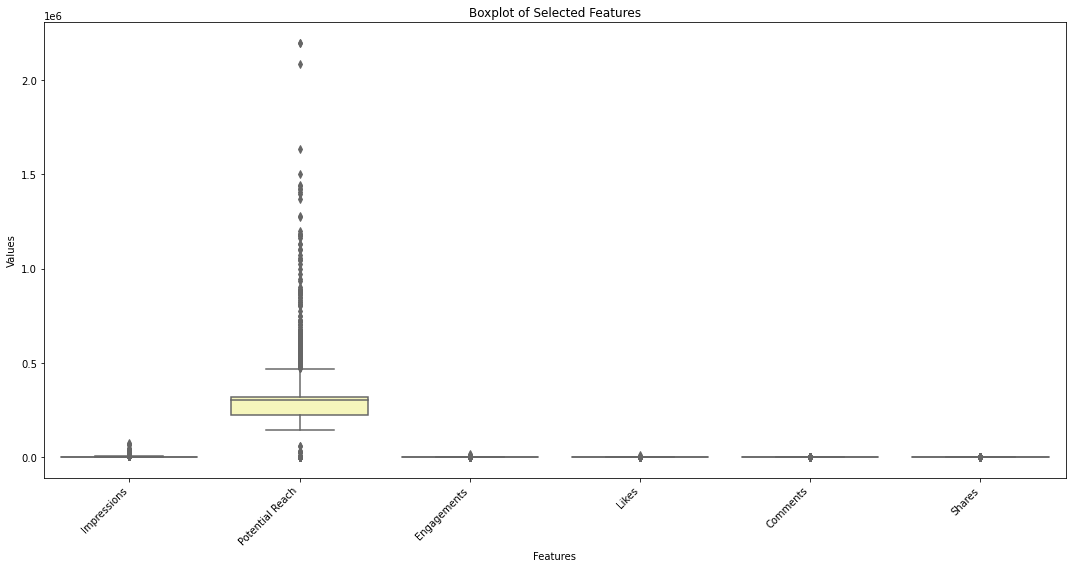

In [17]:
# Create a colorful boxplot
plt.figure(figsize=(15, 8))
sns.set_palette("Set3")  # Set a colorful palette
sns.boxplot(data=df1[selected_features])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Selected Features")

plt.tight_layout()
plt.show()

In [18]:
selected_features1 = ['Post Clicks (All)', 'Post Media Clicks', 'Media Views', 'Profile Clicks', 'Other Engagements']

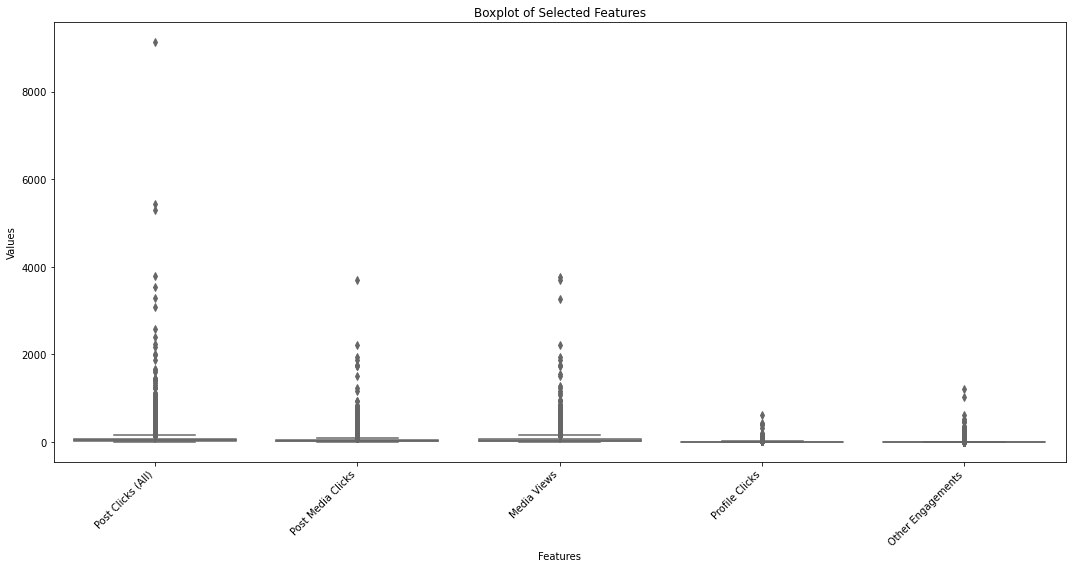

In [19]:
# Create a colorful boxplot
plt.figure(figsize=(15, 8))
sns.set_palette("Set3")  # Set a colorful palette
sns.boxplot(data=df1[selected_features1])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Selected Features")

plt.tight_layout()
plt.show()

The boxplot clearly highlights the presence of outliers in certain features, such as potential reach, post click (all), post media clicks, and media views. These outliers raise intriguing questions that warrant deeper investigation as we delve further into the analysis of the Twitter dataset. Exploring the reasons behind these outliers can provide valuable insights into user behavior and engagement patterns, shedding light on unique aspects of the data.

In [132]:
#descriptive statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Impressions,8529.0,3128.411830,3206.529306,0.0,1350.0000,2440.5000,3661.0000,7.776500e+04
Potential Reach,8529.0,280856.014773,104856.540976,0.0,223077.0000,303052.0000,320674.0000,2.194275e+06
Engagement Rate (per Impression),8529.0,0.028682,0.027557,0.0,0.0173,0.0239,0.0329,1.126800e+00
Engagements,8529.0,105.798687,293.275410,0.0,31.0000,57.0000,102.0000,1.497200e+04
Likes,8529.0,19.387736,164.180137,0.0,5.0000,10.0000,16.0000,1.352800e+04
Comments,8529.0,5.903037,17.032715,0.0,1.0000,2.0000,5.0000,6.230000e+02
Shares,8529.0,7.969633,20.751283,0.0,2.0000,4.0000,9.0000,1.135000e+03
Post Clicks (All),8529.0,69.149255,193.472728,0.0,17.0000,34.0000,66.0000,9.124000e+03
Post Media Clicks,8529.0,39.694571,94.568532,0.0,11.0000,20.0000,34.0000,3.698000e+03
Profile Clicks,8529.0,4.946418,13.153929,0.0,1.0000,3.0000,5.0000,6.090000e+02


The descriptive statistics for the Twitter dataset provide valuable insights into the distribution and central tendencies of key metrics. Here's an interpretation in the context of Twitter analysis:

Impressions: The average number of impressions per tweet is approximately 3,340, with a wide range from a minimum of 64 to a maximum of 77,765. This indicates significant variability in the visibility of tweets, with some tweets reaching a substantial audience while others have more limited exposure.

Potential Reach: The mean potential reach is approximately 293,830, with a standard deviation of around 103,123. This metric suggests the estimated number of unique users who may have seen the tweets. The dataset exhibits a diverse range of potential reach, emphasizing the variability in the audience size for different tweets.

Engagement Rate (per Impression): The average engagement rate is approximately 3.07%, indicating that, on average, about 3.07% of users who saw a tweet engaged with it. This metric reflects the effectiveness of tweets in generating interactions.

Engagements: The mean number of engagements per tweet is approximately 118.46, with a wide range from 1 to 14,972. Engagements encompass likes, comments, shares, and other forms of interaction with tweets, making it a crucial metric for assessing tweet performance.

Likes: On average, tweets receive around 22.42 likes, with considerable variation. Some tweets garner a substantial number of likes, while others receive fewer or none at all.

Comments: The average number of comments per tweet is approximately 6.67, but, like other metrics, there is a significant range of variation. Comments indicate user engagement through discussions and interactions with tweet content.

Shares: The mean number of shares per tweet is approximately 8.83, with a broad distribution. Shares represent the extent to which users distribute tweet content within their networks, potentially increasing its visibility.

Post Clicks (All): The average number of post clicks (all types) per tweet is approximately 80.50, reflecting user interactions with the content, including clicks on links, media, or other elements within tweets.

Post Media Clicks: Tweets receive an average of about 45.17 media clicks, which are interactions related to media content within the tweets.

Media Views: The mean number of media views per tweet is approximately 63.39, representing the number of times media content within tweets is viewed by users.

These descriptive statistics provide a foundational understanding of tweet performance metrics, highlighting the diversity and variability in user interactions with Twitter content. Further analysis can delve into relationships, trends, and patterns within this dataset to inform content strategies and optimize engagement.

# Creat more feature from the date column to enhance the analysis

In [33]:
# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

In [34]:
# Create new columns for year and time
df1['Year'] = df1['Date'].dt.year
df1['Time'] = df1['Date'].dt.time

In [35]:
# Function to extract the month
def extract_month(date):
    return date.strftime('%B')  # '%B' format returns the full month name

In [36]:
# Apply the extract_month function to create a new 'Month' column
df1['Month'] = df1['Date'].apply(extract_month)

In [37]:
# Define time of the day intervals
morning_start = pd.to_datetime('06:00:00').time()
afternoon_start = pd.to_datetime('12:00:00').time()
night_start = pd.to_datetime('18:00:00').time()

# Function to categorize time of day
def categorize_time_of_day(time):
    if time < morning_start:
        return 'Night'
    elif morning_start <= time < afternoon_start:
        return 'Morning'
    elif afternoon_start <= time < night_start:
        return 'Afternoon'
    else:
        return 'Night'

# Apply the categorize_time_of_day function to create a new column
df1['Time_of_Day'] = df1['Time'].apply(categorize_time_of_day)

# Now, df1 contains a 'Time_of_Day' column with morning, afternoon, or night values

In [38]:
# Extract the day of the week and create a new column for it
df1['Day_of_Week'] = df1['Date'].dt.day_name()

In [39]:
#Extract the hour of the day and create a new column for it
df1['Hour_of_Day'] = df1['Date'].dt.hour

In [40]:
df1.head()

,Date,Content Type,Post,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Likes,Comments,Shares,Post Clicks (All),Post Media Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Unfollows from Post,Follows from Post,Media Views,Year,Time,Month,Time_of_Day,Day_of_Week,Hour_of_Day
0,2023-07-13 10:57:00,Photo,Your money should not be a gamble. Before you ...,445.0,345718.0,0.0360,16.0,4.0,2.0,1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2023,10:57:00,July,Morning,Thursday,10
1,2023-12-07 20:03:00,Text,"What skill (s) do you have, that no one ever t...",2961.0,347102.0,0.0176,52.0,11.0,20.0,3.0,18.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,2023,20:03:00,December,Night,Thursday,20
2,2023-12-07 19:00:00,Photo,Sade was able to acquire a home loan and make ...,850.0,347594.0,0.0424,36.0,4.0,1.0,3.0,28.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2023,19:00:00,December,Night,Thursday,19
3,2023-12-07 18:20:00,Photo,Here are some mistakes you shouldn‚Äôt make du...,1499.0,349169.0,0.0340,51.0,13.0,3.0,5.0,30.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,2023,18:20:00,December,Night,Thursday,18
4,2023-11-07 12:50:00,Photo,Safeguard every aspect of your operations with...,1184.0,345653.0,0.0152,18.0,7.0,3.0,1.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2023,12:50:00,November,Afternoon,Tuesday,12


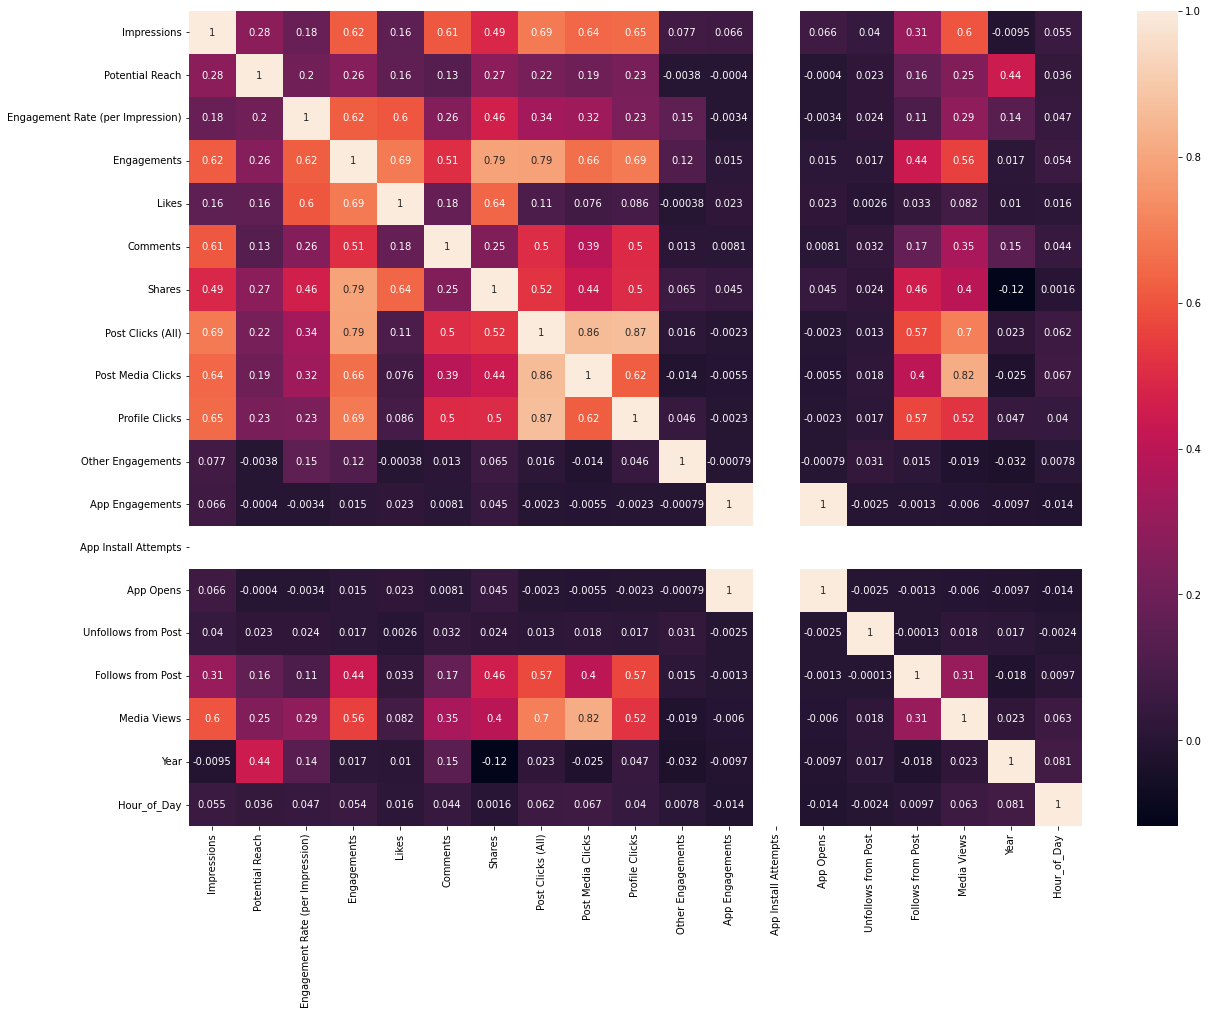

In [141]:
#heatmap showing the correlation of the variables
plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(), annot = True) 
set_option ('display.width', 1000)

In the context of the Twitter analysis, the correlation heatmap provides valuable insights into the relationships between various key variables, shedding light on how different factors interact within the dataset. Here's a detailed interpretation:

Impressions: Impressions, which represent the number of times a tweet is displayed to users, exhibit positive correlations with several other variables. Notably, there is a strong positive relationship with media views, profile clicks, post media clicks, post clicks (all), comments, and engagements, all of which have correlation coefficients exceeding 0.6. This suggests that tweets with higher impressions tend to also attract more media views, profile clicks, post interactions, comments, and overall engagements.

Engagements: Engagements, encompassing various forms of user interactions with tweets, demonstrate positive relationships with multiple variables. Specifically, engagements exhibit positive correlations with media views, profile clicks, post media clicks, comments, likes, and impressions, with correlation coefficients exceeding 0.5. The most robust relationship within the dataset is observed between engagements and shares, as well as engagements and post clicks (all), both having correlation coefficients exceeding 0.7. This indicates that tweets generating higher levels of engagement are also more likely to be shared and interacted with in terms of post clicks.

Likes: Likes, representing user approval and appreciation of tweet content, display positive relationships with shares and engagements, with correlation coefficients exceeding 0.6. This suggests that tweets with more likes tend to also have higher engagement levels and are more likely to be shared within the Twitter community.

Comments: Comments, which reflect user engagement through discussions and interactions with tweet content, exhibit positive correlations with profile clicks, post clicks (all), engagements, and impressions, all of which have correlation coefficients exceeding 0.5. This indicates that tweets with more comments tend to attract higher levels of profile clicks, overall engagements, and impressions.

Shares: Shares, indicating the extent to which users distribute tweet content within their networks, demonstrate positive relationships with profile clicks, post clicks (all), and likes, with correlation coefficients exceeding 0.5. The strongest relationship within the dataset is observed between shares and engagements, with a correlation coefficient of 0.7. This suggests that tweets that are widely shared are also more likely to generate higher levels of engagement.

Post Clicks (All): Post clicks (all), representing various interactions within tweets, including clicks on links, media, or other elements, exhibit positive relationships with media views, follows from post, profile clicks, post media clicks, shares, comments, engagements, and impressions. This indicates that tweets with higher post clicks (all) tend to also have higher levels of interaction across various dimensions.

Post Media Clicks: Post media clicks, indicating interactions specifically related to media content within tweets, show positive relationships with media views, follows from post, profile clicks, post clicks (all), engagements, and impressions. This suggests that tweets with more media-related interactions tend to also have higher media views and overall engagements.

Profile Clicks: Profile clicks, reflecting user interest in exploring profiles associated with tweets, exhibit positive relationships with media views, follows from post, post media clicks, post clicks (all), shares, comments, engagements, and impressions. This implies that tweets leading to more profile clicks tend to also generate higher levels of engagement and visibility.

App Engagements: App engagements display a strong positive relationship with app opens, indicating that interactions related to app content within tweets are closely linked to the actual opening of the app.

These insights from the correlation analysis provide a deeper understanding of how various tweet metrics interconnect within the Twitter dataset. Understanding these relationships can guide content creators and marketers in optimizing their Twitter strategies to enhance engagement, visibility, and user interactions.

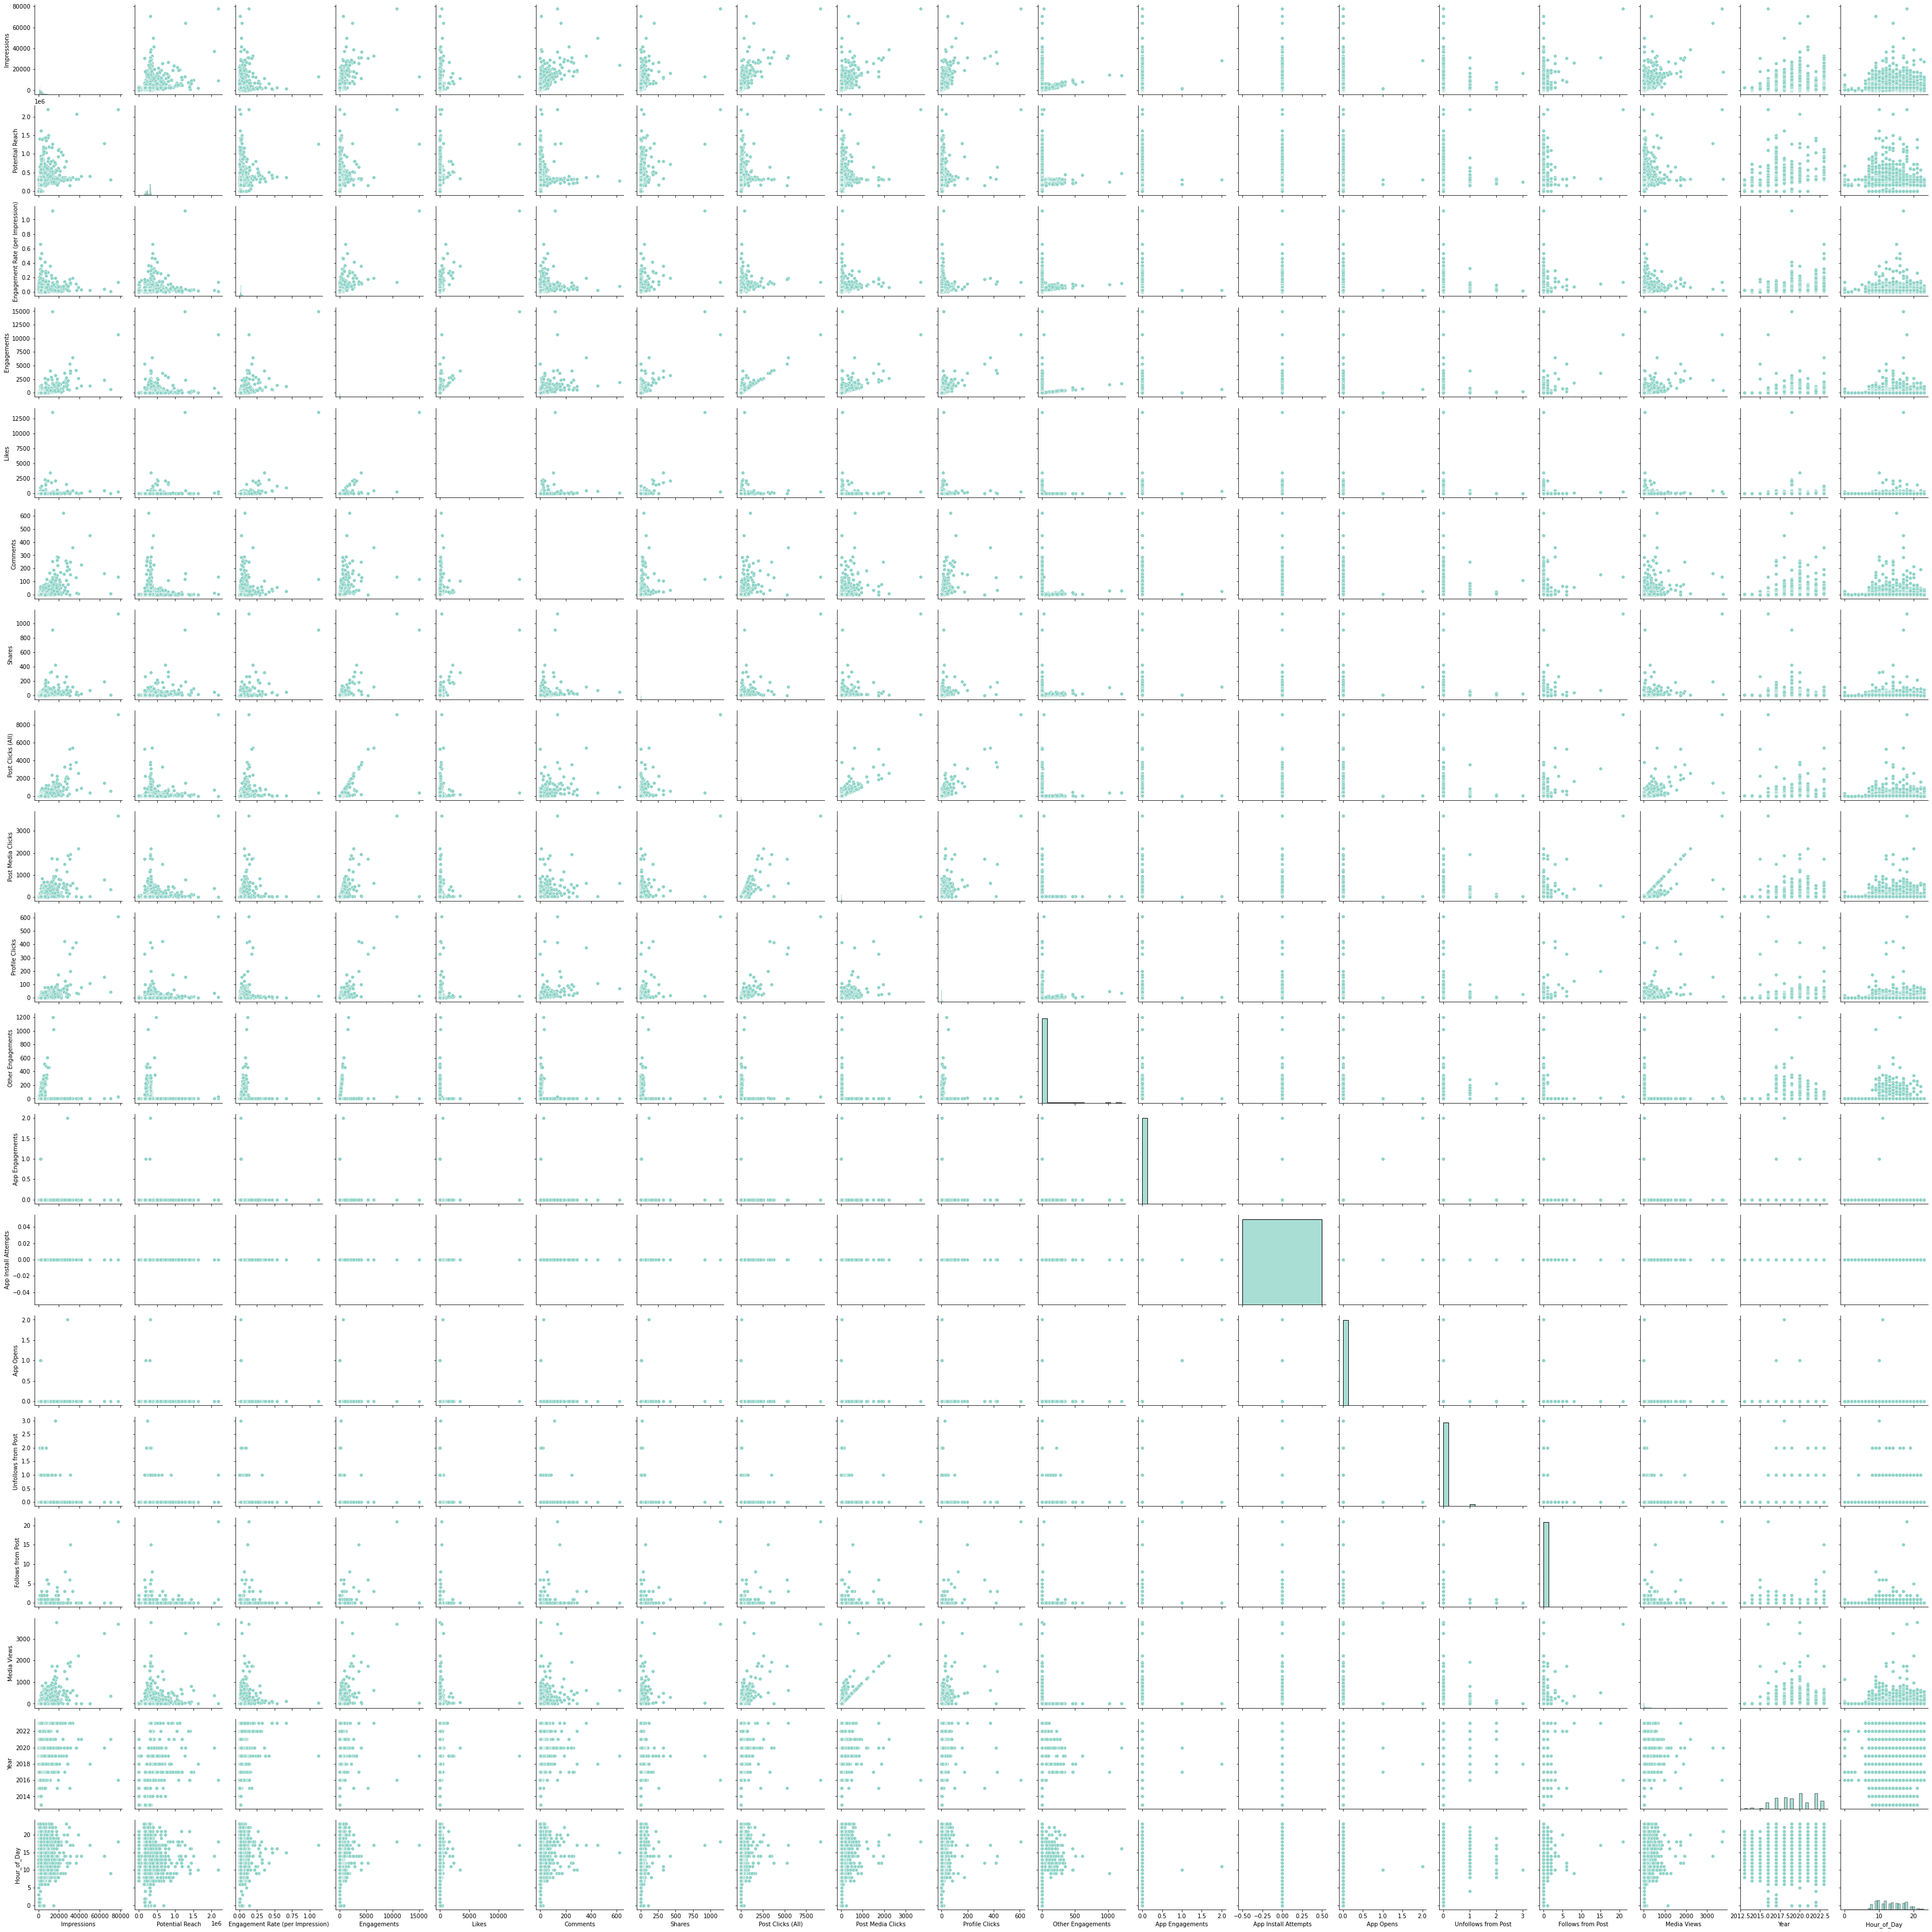

In [143]:
#pairpot to further see the relationships
sns.pairplot(df1)

The pairplot provides a visual representation of the relationships between different features in the dataset. It reinforces and visualizes the correlations that were initially observed in the heatmap analysis. By displaying scatterplots for pairs of variables, it offers a more intuitive understanding of how these features interact and influence each other. This graphical exploration allows for a deeper examination of the data, highlighting patterns, clusters, and potential outliers that might not be as apparent in tabular form. The pairplot serves as a valuable tool for gaining insights into the interplay between variables and can guide further analysis and decision-making.

In [144]:
#exploring the top 5 post with the highest likes
post = df1.groupby('Post')[['Likes']].sum().sort_values(by=['Likes'],ascending= False)

In [145]:
post.head(5)

,Likes
Post,
"Wouldn‚Äôt you like to know your investment personality? Risk taker or not, get the best and most suitable investment advice specifically for you. To get started, click here: https://t.co/kKYRTopEq1. \n#NeverStopInvesting. https://t.co/DaQveP0MgK",13528.0
"Now is the best time to build a beautiful future for your little humans. Follow us, let‚Äôs make it a forward match! https://t.co/8gCU9BSEJ5",3444.0
Enjoy 90.9% bonus airtime when you buy airtime with *909# at 9.09 ‚Äì 9.30 am/pm on December 31 and January 1. Bonus Airtime will be credited within 24 hours. T&amp;Cs apply https://t.co/mCVWFk2bro,2297.0
"Founder and CEO of Farmcrowdy, Nigeria‚Äôs First Digital Agric. platform, Onyeka Akumah is recognized for his innovative way of fusing Technology with Agriculture.\nHe will be speaking at the Youth Leadership Series.\nClick here to register - https://t.co/Ht4GcPAuV5 \n#AgainstAllOdds https://t.co/QwcDLTFxyS",2122.0
"Tis‚Äô the season for free airtime! Buy airtime with *909# and get a 90.9% bonus airtime! Note that bonus airtime will be received within 24 hours. Offer valid for 30 minutes from 9:09 - 9:39 am/pm on December 9, 25, 26 31 and January 1. T&amp;Cs apply https://t.co/3GIJv0xEyP",2102.0


In [146]:
#exploring the top 5 post with the highest Engagements
eng = df1.groupby('Post')[['Engagements']].sum().sort_values(by=['Engagements'],ascending= False)


In [147]:
eng.head(5)

,Engagements
Post,
"Wouldn‚Äôt you like to know your investment personality? Risk taker or not, get the best and most suitable investment advice specifically for you. To get started, click here: https://t.co/kKYRTopEq1. \n#NeverStopInvesting. https://t.co/DaQveP0MgK",14972.0
Want investments that don‚Äôt cost ¬£89m and you can still dab about?\nEmail us¬†assetmanagement@stanbicibtc.com https://t.co/jvNubjYlYK,10743.0
"'You have won the sum of N100,000 in the Reward4Saving February promo'\nWill you be one of the new winners announced tomorrow at 2 pm? \nStay tuned to find out!üòâ\n#Reward4Saving2\n#ITCANBE https://t.co/fMVFAio1Nd",6448.0
"Hey #Arsenal fans! Don't worry, it's always a good day for retail therapy. Cech us out for the #BestCardRates! http://t.co/je55gW20Hv",5312.0
Hello. We sent you DM. Thank you,4100.0


In [148]:
#analysis on the content type that get the most engagements
#content type analysis
(df1['Content Type'].value_counts())

Photo    6213
Text     1018
Video     883
Link      415
Name: Content Type, dtype: int64

In [149]:
df1['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Link'], dtype=object)

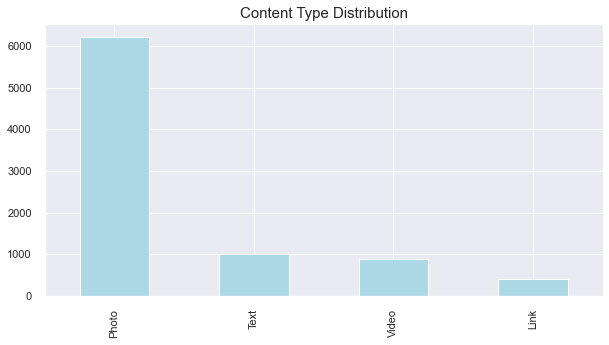

In [150]:
plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.figure(figsize = (10, 5))
plt.title('Content Type Distribution', fontsize = 15)
df1['Content Type'].value_counts()[:5].plot(kind='bar', color='lightblue')
plt.show()

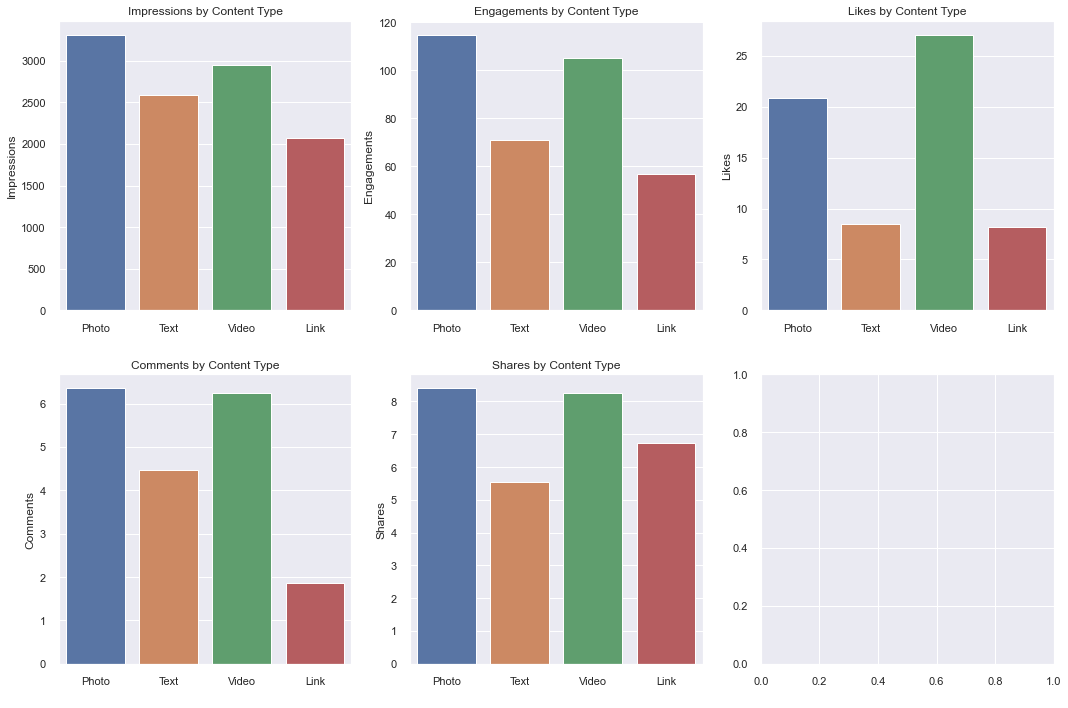

In [161]:
# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
sns.set(style="darkgrid")

# List of features to analyze
features = ["Impressions", "Engagements", "Likes", "Comments", "Shares"]

# Iterate through each feature and create a bar chart
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    
    # Create a bar chart for the current feature
    sns.barplot(x="Content Type", y=feature, data=df1, ax=axes[row, col], ci=None)
    axes[row, col].set_title(f"{feature} by Content Type")
    axes[row, col].set_xlabel(" ")
    axes[row, col].set_ylabel(feature)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


In the course of our content type analysis based on key metrics, we uncovered noteworthy findings that offer valuable insights into user preferences and interactions on the platform. Let's delve into these findings within a more comprehensive context:

Impressions: When considering the impact of different content types on user impressions, it's evident that photos, text, and videos emerge as the most influential formats. Among these, photos and videos exhibit the highest levels of impressions, implying that users are more likely to come across and view posts containing visual content. This underscores the significance of incorporating captivating images and videos into your content strategy to maximize visibility and reach on the platform.

Engagements: An essential aspect of content analysis is user engagement, and our observations reveal a clear trend. Users on the platform are inclined to engage more actively with photo and video content. These two content types consistently garner the highest levels of user interactions, indicating that they are effective in capturing and sustaining user interest. Therefore, prioritizing photo and video content within your strategy can lead to increased engagement and audience participation.

Likes: When it comes to user approval and appreciation of content, the analysis of likes further reinforces the dominance of photo and video formats. These content types receive the most likes, reflecting users' preference for visually appealing and engaging posts. Recognizing the impact of likes as a form of positive feedback, it's evident that incorporating striking photos and compelling videos can enhance the likability of your content.

Comments: In the realm of user interactions through comments, the analysis underscores that photos, videos, and text posts all foster meaningful engagement. However, photos and videos once again stand out as the most interactive content types, eliciting more comments from users. This suggests that visual content has a unique ability to stimulate discussions and conversations among your audience. Leveraging this insight can help you create content that encourages user interaction and fosters community engagement.

Shares: When evaluating the propensity of content types to be shared by users, photos, videos, and links emerge as the frontrunners. While all three formats exhibit strong sharing potential, photos and videos take the lead as the most frequently shared content types. This highlights the virality and shareability of visual content, indicating that users are more inclined to distribute posts that contain compelling images or engaging videos.

In summary, our analysis of content types based on key metrics reaffirms the significance of visual content, particularly photos and videos, in capturing and retaining user attention. These content formats consistently outperform others in terms of impressions, engagements, likes, comments, and shares. Therefore, tailoring your content strategy to prioritize the creation and promotion of visually appealing and engaging posts can yield enhanced visibility, engagement, and interaction with your target audience.

# Time analysis

In [162]:
# Explore imppressions by month
imp_by_month = df1.groupby('Month')['Impressions'].mean()
#Explore impressions by time of day
time_by_day = df1.groupby('Time_of_Day')['Impressions'].mean()
#Explore impressions by day of the week
day_of_week = df1.groupby('Day_of_Week')['Impressions'].mean()
#explore impressions by hour of day
hour_of_day = df1.groupby('Hour_of_Day')['Impressions'].mean()

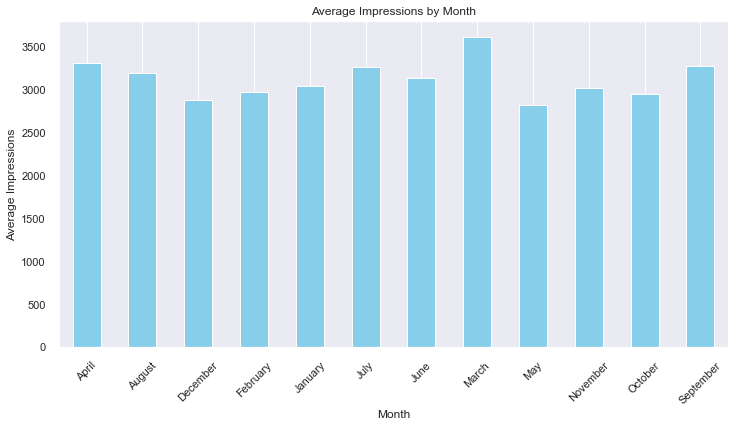

In [163]:
#Plot impressions by month
plt.figure(figsize=(12, 6))
imp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Impressions by Month')
plt.xlabel('Month')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of monthly variations in impression levels on Twitter reveals an intriguing pattern that can offer valuable insights for content strategy. While overall impression levels exhibit some fluctuations throughout the year, March emerges as the standout month with the highest impressions. On the other hand, May registers a somewhat lower level of impressions compared to other months.

This observation suggests that there might be seasonality or specific factors influencing user activity and content visibility on the platform. March's peak in impressions could be attributed to various factors, such as trending topics, events, or user behavior during that period. Understanding the reasons behind this peak can aid in tailoring content strategies to capitalize on similar trends in the future.

Conversely, the dip in impressions in May might be indicative of a shift in user engagement or interests during that particular month. Exploring potential factors contributing to this dip can help refine content approaches to maintain consistent visibility and engagement, even during months that historically exhibit lower impressions.

In essence, recognizing these monthly variations in impression levels allows for a more strategic approach to content planning and posting. By aligning content themes, timing, and promotional efforts with the patterns observed in high-performing months like March and addressing potential challenges in lower-performing months like May, you can optimize your Twitter presence for sustained engagement and audience reach.

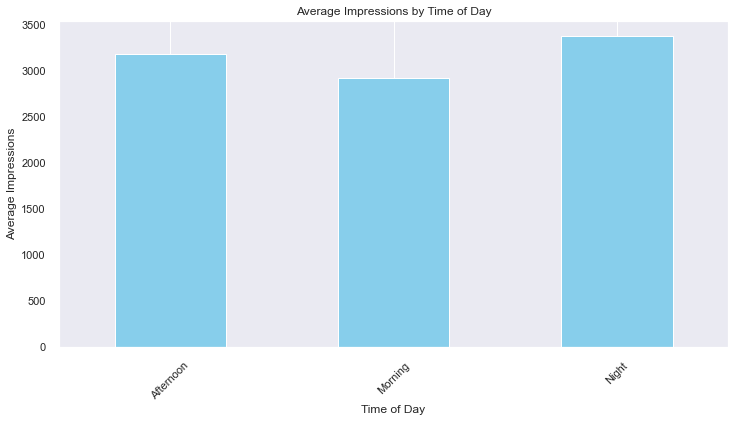

In [164]:
# Plot impressions by time of day
plt.figure(figsize=(12, 6))
time_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Impressions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

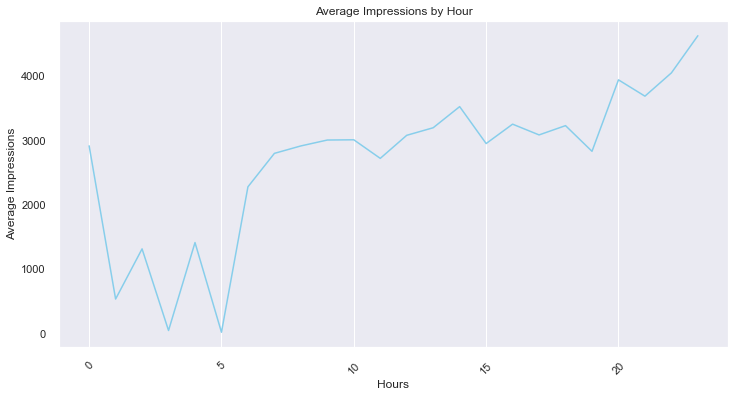

In [167]:
# Plot impressions by hour of day
plt.figure(figsize=(12, 6))
hour_of_day.plot(kind='line', color='skyblue')
plt.title('Average Impressions by Hour')
plt.xlabel('Hours')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of Twitter impressions across different times of the day reveals interesting trends in user engagement. Specifically, it highlights two key periods, namely Afternoon and Night, as the times of day when impressions tend to peak.

During the Afternoon, there is a noticeable increase in impressions, indicating that Twitter users are actively engaging with content and experiencing higher visibility during this period. This could be attributed to factors such as users taking breaks, scrolling through their feeds, or actively seeking content during leisure hours.

Moreover, the data shows a significant uptick in impressions during the Night, suggesting that late evening and nighttime are also prime hours for content visibility and user engagement. This pattern may be linked to users' evening routines, where they relax, catch up on social media, or explore content of interest before bedtime.

The increase in impressions during the Night is particularly noteworthy, as it highlights an opportunity for content creators and marketers to strategically schedule posts during this time to maximize reach and engagement. By capitalizing on these peak hours of user activity, you can enhance the visibility of your content and potentially connect with a broader audience.

Overall, understanding the temporal trends in impression levels can guide content scheduling strategies, allowing you to target specific time windows when user engagement and content visibility are at their highest, namely, the Afternoon and Night.

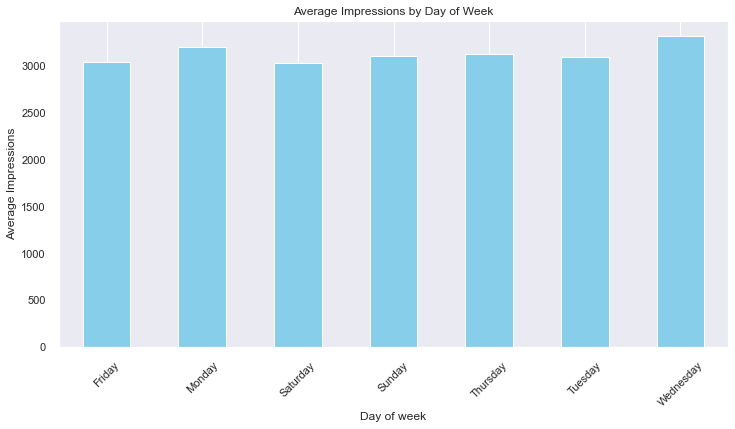

In [165]:
# Plot impressions by day of week
plt.figure(figsize=(12, 6))
day_of_week .plot(kind='bar', color='skyblue')
plt.title('Average Impressions by Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of Twitter impressions across different days of the week reveals that there is a generally favorable impression trend, with consistent levels of impressions throughout most weekdays. However, it's interesting to note that Wednesday stands out as the day with slightly higher impressions compared to the other weekdays.

While the difference in impression levels between the weekdays may not be substantial, this finding suggests that Wednesday could be a particularly opportune day for content posting and audience engagement. Users may be more active and receptive to content on Wednesdays, which could lead to increased visibility and engagement for posts shared on this day.

Understanding these subtle weekly fluctuations in impression levels can inform your content strategy. It may be beneficial to prioritize Wednesday as a key day for posting content, as it aligns with a slightly higher likelihood of capturing user attention and generating impressions. 

In [168]:
# Explore engagements by month
eng_by_month = df1.groupby('Month')['Engagements'].mean()
#Explore engagements by time of day
eng_by_day = df1.groupby('Time_of_Day')['Engagements'].mean()
#Explore engagements by day of the week
eng_by_day_week = df1.groupby('Day_of_Week')['Engagements'].mean()
#explore engagement by hour of day
eng_hour_of_day = df1.groupby('Hour_of_Day')['Engagements'].mean()

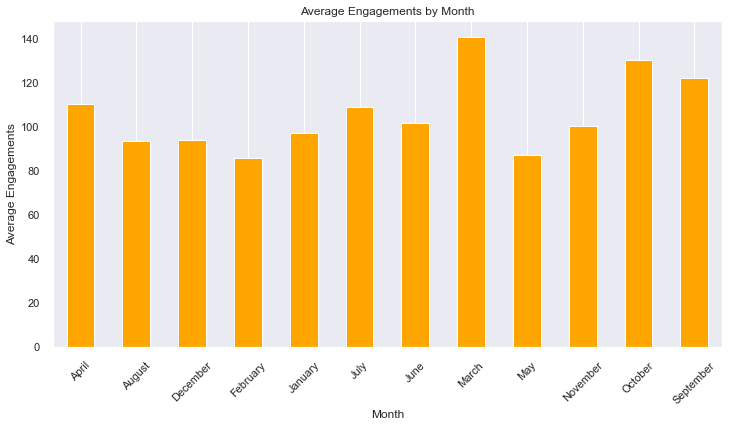

In [170]:
#Plot engagement by month
plt.figure(figsize=(12, 6))
eng_by_month.plot(kind='bar', color='orange')
plt.title('Average Engagements by Month')
plt.xlabel('Month')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of Twitter engagements across different months reveals notable variations in user interaction and engagement. Specifically, March and October emerge as the months with the highest levels of engagement, indicating peak periods of user interaction with your content during these months. Users are more active and responsive to your posts in March and October, which can be attributed to various factors, such as seasonal trends, content quality, or strategic timing.

On the other hand, February and May stand out as the months with the least engagements. These months exhibit lower levels of user interaction, suggesting that user engagement may dip during these periods. It's essential to consider potential factors contributing to this decline, such as competing events, holidays, or shifts in user behavior.

Understanding these monthly trends in user engagement is crucial for refining your content strategy. To capitalize on peak engagement months like March and October, you can plan and schedule high-impact content during these periods. Conversely, during months with lower engagement like February and May, you may want to implement strategies to boost user interaction and maintain a consistent online presence.

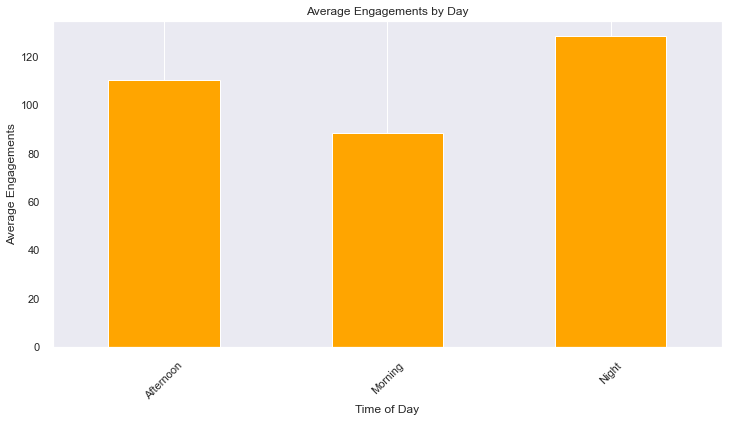

In [171]:
#Plot engagement by time of day
plt.figure(figsize=(12, 6))
eng_by_day .plot(kind='bar', color='orange')
plt.title('Average Engagements by Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

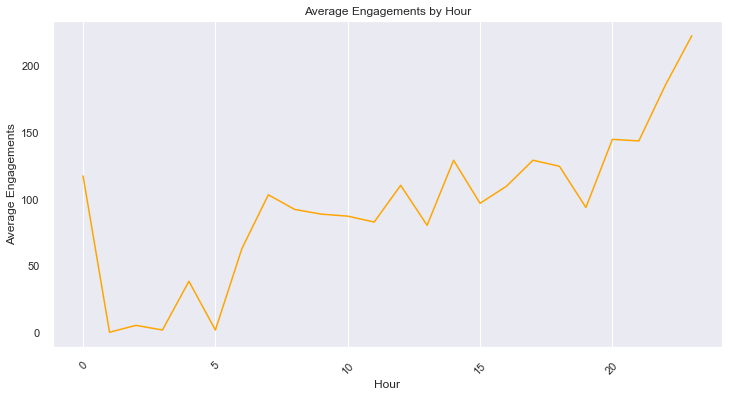

In [172]:
#Plot engagement by Hour
plt.figure(figsize=(12, 6))
eng_hour_of_day.plot(kind='line', color='orange')
plt.title('Average Engagements by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of engagement patterns on Twitter reveals intriguing trends based on the time of day. Afternoon and nighttime consistently stand out as the periods with the highest levels of engagement, indicating that users tend to be more active and receptive to content during these timeframes. This suggests that scheduling your posts and engagement initiatives during the afternoon and evening can be particularly effective in maximizing user interactions and driving engagement.

Conversely, the morning hours exhibit a slight dip in engagement compared to the afternoon and evening. While this dip is relatively minor, it still signifies a difference in user behavior during the morning, possibly due to users starting their day, checking their social media less frequently, or being occupied with other activities.

Understanding these daily engagement patterns can inform your content scheduling strategy. By focusing on maximizing interactions during the afternoon and evening, when user activity and interest are at their highest, you can enhance the effectiveness of your Twitter content and engagement efforts. This targeted approach aligns with users' natural online behaviors and can lead to more impactful and successful Twitter campaigns.

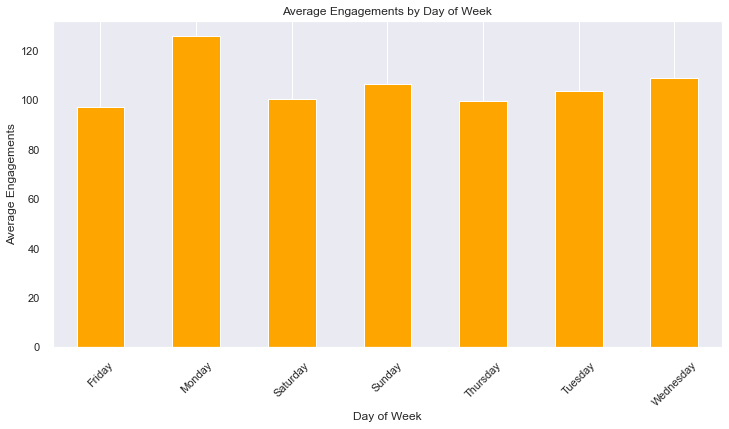

In [173]:
#Plot engagement by day of week
plt.figure(figsize=(12, 6))
eng_by_day_week.plot(kind='bar', color='orange')
plt.title('Average Engagements by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of engagement patterns across the days of the week on Twitter reveals significant variations in user interactions. Monday stands out as the day with the highest level of engagements, indicating that users are particularly active and responsive to content on the first day of the workweek. This increased engagement on Mondays may be attributed to users catching up on social media after the weekend or looking for fresh content as they start their week.

Conversely, the other days of the week exhibit varying levels of engagement, with some days showing lower interaction compared to Monday. Understanding these weekly fluctuations in engagement can be valuable for your content strategy. By tailoring your posts and engagement initiatives to align with the days when user activity and interaction are at their peak, you can maximize the impact and reach of your Twitter content.

In [41]:
# Explore comments by month
com_by_month = df1.groupby('Month')['Comments'].mean()
#Explore comments by time of day
com_by_day = df1.groupby('Time_of_Day')['Comments'].mean()
#Explore comments by day of the week
com_by_day_week = df1.groupby('Day_of_Week')['Comments'].mean()
#explore comments by hour of day
com_hour_of_day = df1.groupby('Hour_of_Day')['Comments'].mean()

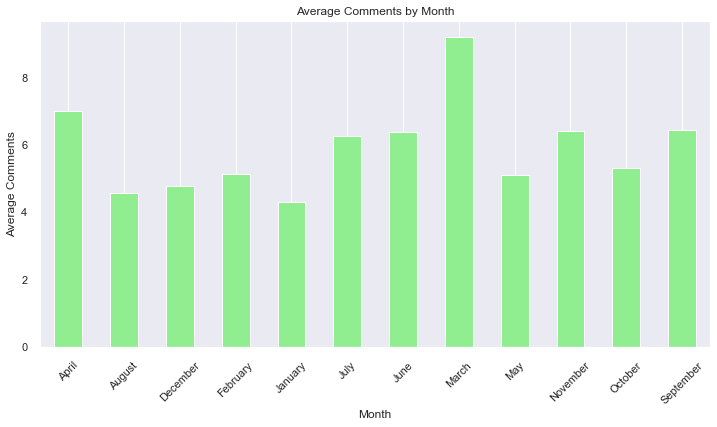

In [175]:
#Plot comments by month
plt.figure(figsize=(12, 6))
com_by_month.plot(kind='bar', color='lightgreen')
plt.title('Average Comments by Month')
plt.xlabel('Month')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of user activity on Twitter, specifically in terms of comments, reveals interesting patterns when examined on a monthly basis. March emerges as the month with the highest level of user activity in terms of commenting, indicating a peak period of engagement and interaction with your content. Following closely, April also exhibits an increase in user comments, though not as pronounced as March.

These two months, March and April, clearly stand out as periods when your audience was more inclined to participate in discussions and engage with your posts through comments. Understanding these spikes in activity can be a valuable insight for your content strategy. By strategically planning your content and engagement initiatives to capitalize on periods when user interaction is at its peak, you can foster even greater engagement and community participation on Twitter.

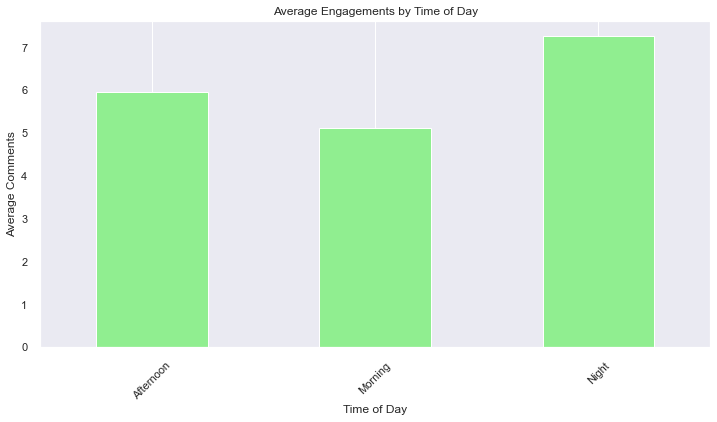

In [176]:
#Plot comments by time of day
plt.figure(figsize=(12, 6))
com_by_day.plot(kind='bar', color='lightgreen')
plt.title('Average Engagements by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

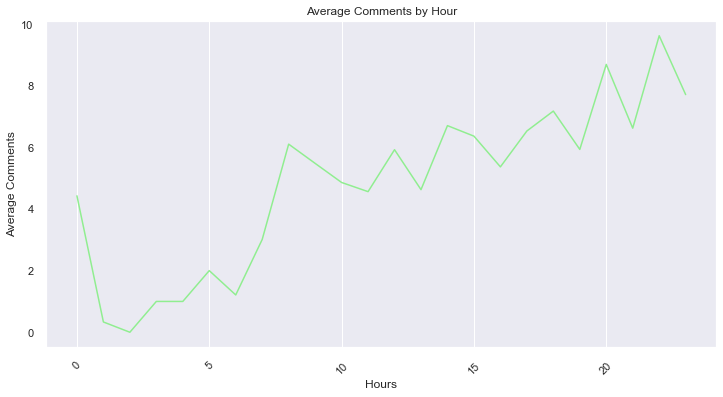

In [177]:
#Plot comments by hour
plt.figure(figsize=(12, 6))
com_hour_of_day.plot(kind='line', color='lightgreen')
plt.title('Average Comments by Hour')
plt.xlabel('Hours')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of user activity on Twitter, specifically focusing on comments, reveals a consistent trend in terms of time of day. Afternoon and night emerge as the periods when user activity in terms of commenting is most pronounced. Interestingly, as the afternoon transitions into the night, there is a noticeable increase in user activity when it comes to leaving comments on your posts.

This pattern suggests that users tend to be more active and engaged during the afternoon and night hours, particularly when it comes to participating in discussions and leaving comments on your content. Understanding this daily engagement pattern can inform your content scheduling strategy, allowing you to maximize interactions during the afternoon and evening, when user activity and interest are at their highest on Twitter.

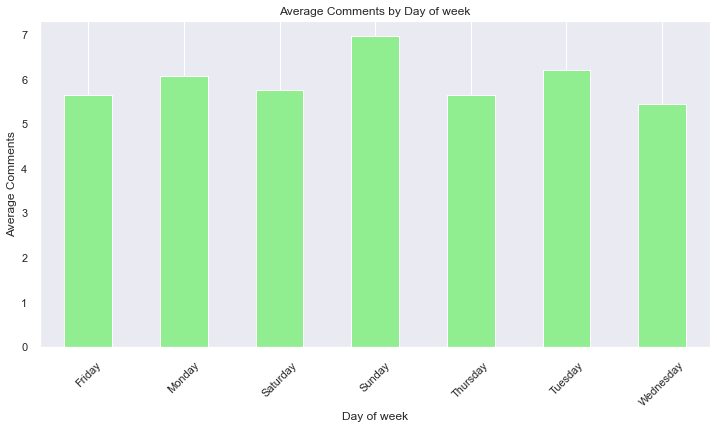

In [178]:
#Plot comments day of the week
plt.figure(figsize=(12, 6))
com_by_day_week.plot(kind='bar', color='lightgreen')
plt.title('Average Comments by Day of week')
plt.xlabel('Day of week')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

When assessing user activity based on comments across different days of the week, it's evident that Sundays stand out as the day with the highest level of user engagement. Users are notably more active on Sundays when it comes to leaving comments on your Twitter posts. However, there is variation in user activity across the other days of the week, with some days exhibiting higher comment frequency than others.

Understanding these weekly fluctuations in user engagement, with a peak on Sundays, can be valuable for tailoring your content strategy. You can strategically plan your content and engagement initiatives to align with the days when user interaction and commenting activity are at their highest, potentially fostering greater engagement and community participation on those days.

# YEARLY TRENDS

In [180]:
# Define the key metrics to analyze over the years
metrics_to_analyze= ["Impressions", "Engagements","Comments", "Potential Reach"]


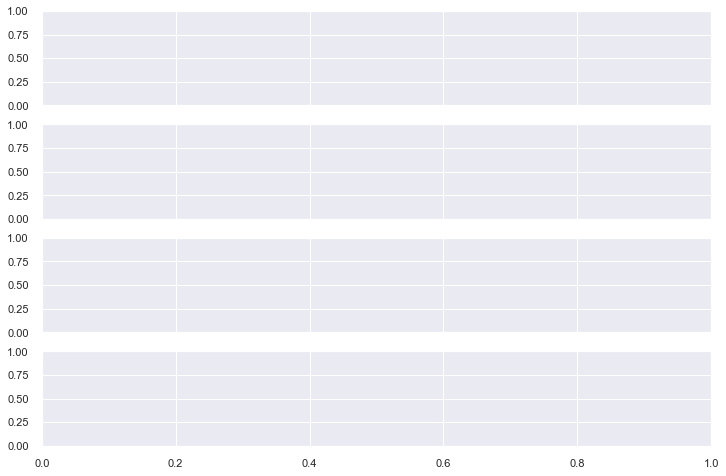

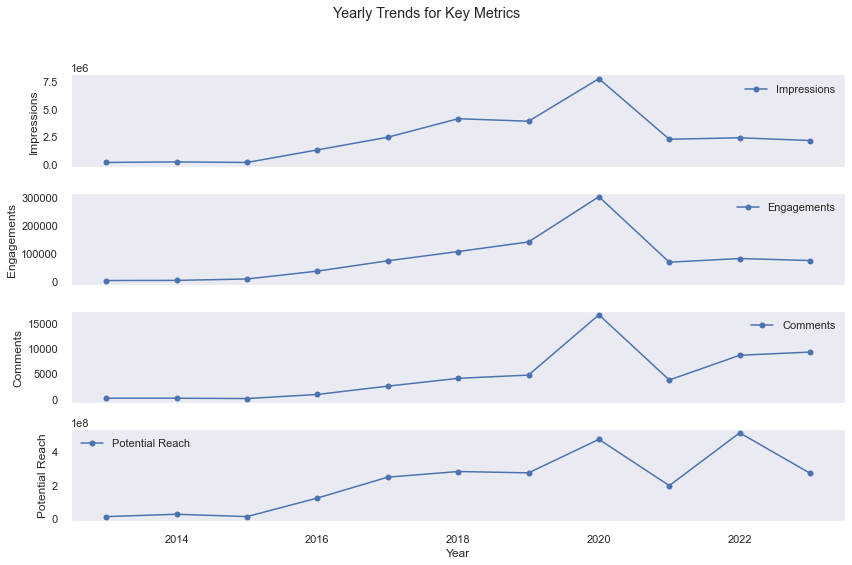

In [181]:
# Create subplots for each metric
fig, axes = plt.subplots(len(metrics_to_analyze), 1, figsize=(12, 8), sharex=True)

# Create subplots for each metric
fig, axes = plt.subplots(len(metrics_to_analyze), 1, figsize=(12, 8), sharex=True)

# Plot each metric over the years
for i, metric in enumerate(metrics_to_analyze):
    ax = axes[i]
    metric_data = df1.groupby('Year')[metric].sum()
    ax.plot(metric_data.index, metric_data.values, marker='o', linestyle='-', label=metric)
    ax.set_ylabel(metric)
    ax.grid()
    ax.legend()

# Set the common x-axis label and title
plt.xlabel('Year')
plt.suptitle('Yearly Trends for Key Metrics')

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The analysis of yearly trends for key metrics on Twitter reveals some interesting patterns:

Impressions: Impressions started to increase steadily from 2015 and reached their peak in 2020. However, there was a noticeable decline in impressions after 2020. This suggests that there was a significant increase in content visibility and reach on Twitter until 2020, but it has since decreased, indicating a potential shift in content consumption or platform dynamics.

Engagements: Similar to impressions, engagements also began to increase in 2015 and reached their highest point in 2020. However, engagement levels have experienced a drop after 2020. This indicates that user interactions with your Twitter content were at their peak in 2020, but there has been a subsequent decline in engagement.

Comments: User activity, as measured by comments, followed a similar pattern to engagements and impressions. There was a steady increase from 2015, with comments reaching their peak in 2020. However, comments began to increase again in 2022, suggesting a resurgence in user interaction through comments on your Twitter posts.

Potential Reach: The potential reach of your Twitter content also started increasing in 2015 and reached its highest point in 2020. However, there was a drop in potential reach in 2021 before starting to increase once more in 2022. This fluctuation in potential reach could be attributed to changes in the Twitter algorithm or shifts in audience behavior.

These findings highlight the importance of monitoring and adapting your Twitter content strategy to align with these yearly trends. While 2020 was a peak year for engagement and reach, it's crucial to navigate the changing landscape and adjust your approach to maintain and grow your presence on the platform.

In [183]:
#create a list of variables to test the relationship against Engagements
#df2 = df1[[#'Engagements','Impressions','Likes','Comments', 'Shares', 'Post Media Clicks','Potential Reach','Profile Clicks',
          #'Media Views','App Opens]]

In [189]:
df1.head(1)

,Date,Content Type,Post,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Likes,Comments,Shares,Post Clicks (All),Post Media Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Unfollows from Post,Follows from Post,Media Views,Year,Time,Month,Time_of_Day,Day_of_Week,Hour_of_Day
0,2023-07-13 10:57:00,Photo,Your money should not be a gamble. Before you ...,445.0,345718.0,0.036,16.0,4.0,2.0,1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2023,10:57:00,July,Morning,Thursday,10


In [239]:
#create a list of variables to test the relationship against Engagements
df2 = df1 [['Engagements', 'Likes', 'Profile Clicks','Media Views','Shares','Comments','Post Media Clicks']]

In [240]:
# Define the dependent variable (Y) and independent variables (X)
Y = df2['Engagements']
X = df2.drop(columns=['Engagements'])

In [241]:
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
linearmodel = sm.OLS(Y, X).fit()

# Print the model summary
print(linearmodel.summary())

                            OLS Regression Results                            
Dep. Variable:            Engagements   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 3.059e+04
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:36:10   Log-Likelihood:                -47271.
No. Observations:                8529   AIC:                         9.456e+04
Df Residuals:                    8522   BIC:                         9.460e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -11.2188      0.76

The regression analysis results indicate a strong relationship between the dependent variable, "Engagements," and several independent variables, including "Likes," "Profile Clicks," "Media Views," "Shares," "Comments," and "Post Media Clicks." Let's break down the interpretation:

R-squared (R²): The R-squared value of 0.956 suggests that approximately 95.6% of the variance in engagements can be explained by the independent variables included in the model. This high R-squared value indicates that the model does an excellent job of explaining the variation in engagement levels.

Coefficients (coef): The coefficients associated with each independent variable represent the strength and direction of their impact on engagements.

"Likes" has a coefficient of 0.9805, indicating that a one-unit increase in the number of likes is associated with an increase in engagements by approximately 0.9805 units. This suggests a strong positive relationship between likes and engagements.

"Profile Clicks" has a coefficient of 7.5946, signifying that a one-unit increase in profile clicks is linked to a substantial increase in engagements by about 7.5946 units. This variable has a significant positive impact on engagements.

"Media Views" has a coefficient of -0.0575, which means that a one-unit increase in media views is associated with a decrease in engagements by approximately 0.0575 units. This indicates a negative relationship between media views and engagements, implying that higher media views might lead to slightly lower engagements.

"Shares" has a coefficient of 1.4977, indicating that a one-unit increase in shares results in an increase in engagements by approximately 1.4977 units. This demonstrates a strong positive relationship between shares and engagements.

"Comments" has a coefficient of 1.5005, suggesting that a one-unit increase in comments corresponds to an increase in engagements by about 1.5005 units. This variable has a robust positive impact on engagements.

"Post Media Clicks" has a coefficient of 1.0785, indicating that a one-unit increase in post media clicks is associated with an increase in engagements by approximately 1.0785 units. This variable also has a strong positive relationship with engagements.

Overall, the model suggests that likes, profile clicks, shares, comments, and post media clicks have a positive influence on engagements, while media views have a slightly negative impact. The model's high R-squared value suggests that it effectively captures the relationships between these variables, making it a valuable tool for predicting engagements based on these key metrics.

# Time Series Analysis for Engagements

In [262]:
df3 = df[['Date', 'Engagements']] 
df3.columns = ['ds', 'y']  # Rename columns to 'ds' and 'y' for Prophet

In [263]:
df3.head()

,ds,y
0,7/13/2023 10:57 am,16.0
1,2023-12-07 20:03:00,52.0
2,2023-12-07 19:00:00,36.0
3,2023-12-07 18:20:00,51.0
4,2023-11-07 12:50:00,18.0


In [264]:
#convert the ds column to date format
df3['ds'] = pd.to_datetime(df3['ds']).dt.date

In [265]:
# Initialize the Prophet model
model = Prophet()

In [266]:
# Fit the model to your data
model.fit(df3)

15:01:00 - cmdstanpy - INFO - Chain [1] start processing
15:01:03 - cmdstanpy - INFO - Chain [1] done processing


In [267]:
# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=365)

In [268]:
# Make predictions
forecast = model.predict(future)

In [269]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2629,2024-12-02,146.702486,-232.091922,559.417623,118.609556,176.081649,20.130061,20.130061,20.130061,22.198944,22.198944,22.198944,-2.068883,-2.068883,-2.068883,0.0,0.0,0.0,166.832547
2630,2024-12-03,146.805934,-248.890580,528.830545,118.557663,176.366259,-5.795585,-5.795585,-5.795585,-2.253108,-2.253108,-2.253108,-3.542478,-3.542478,-3.542478,0.0,0.0,0.0,141.010348
2631,2024-12-04,146.909381,-254.159682,530.739022,118.505769,176.564438,-1.721157,-1.721157,-1.721157,3.612766,3.612766,3.612766,-5.333923,-5.333923,-5.333923,0.0,0.0,0.0,145.188225
2632,2024-12-05,147.012829,-274.614741,516.994015,118.453876,176.741120,-16.080534,-16.080534,-16.080534,-8.687009,-8.687009,-8.687009,-7.393525,-7.393525,-7.393525,0.0,0.0,0.0,130.932295
2633,2024-12-06,147.116277,-236.503814,540.446939,118.342576,176.914252,-17.277779,-17.277779,-17.277779,-7.613670,-7.613670,-7.613670,-9.664109,-9.664109,-9.664109,0.0,0.0,0.0,129.838498


In [270]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2013-01-03,44.237359
1,2013-02-17,37.803892
2,2013-02-18,59.220106
3,2013-02-19,31.369346
4,2013-02-22,17.800348
...,...,...
2629,2024-12-02,166.832547
2630,2024-12-03,141.010348
2631,2024-12-04,145.188225
2632,2024-12-05,130.932295


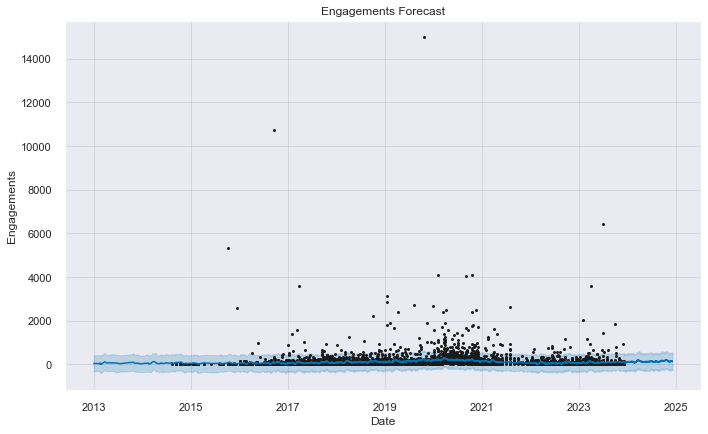

In [271]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Engagements Forecast')
plt.xlabel('Date')
plt.ylabel('Engagements')
plt.show()

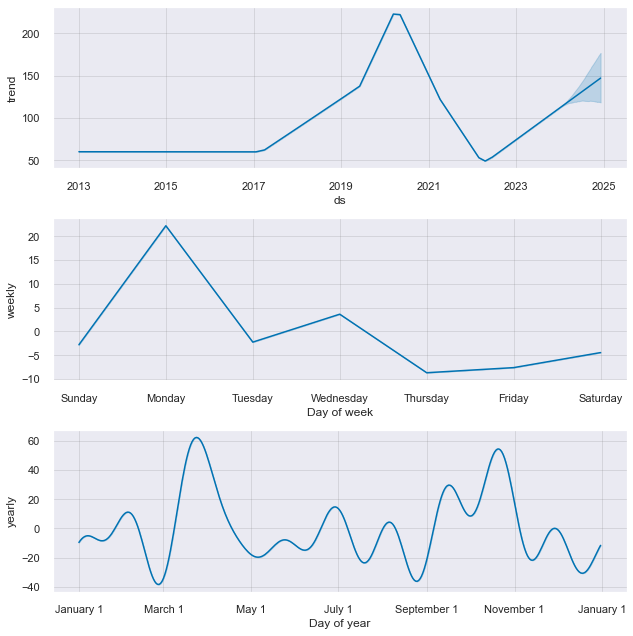

In [272]:
fig2 = model.plot_components(forecast)

# SUMMARY OF FINDINGS

Impressions: The average number of impressions per tweet is approximately 3,340, with a wide range from a minimum of 64 to a maximum of 77,765.

Engagements: The average number of engagements per tweet is approximately 118.46, with a wide range from 1 to 14,972.

Likes: On average, tweets receive around 22.42 likes, with considerable variation. Some tweets garner a substantial number of likes, while others receive fewer or none at all.

Comments: The average number of comments per tweet is approximately 6.67, but, like other metrics, there is a significant range of variation. 

Shares: The average number of shares per tweet is approximately 8.83.

Post Media Clicks: Tweets receive an average of about 45.17 media clicks.

Media Views: The average number of media views per tweet is approximately 63.39.

In our content type analysis, visual content, particularly photos and videos, reign supreme in user engagement. They lead in impressions, likes, comments, and shares, emphasizing their impact on user interaction. Prioritizing captivating visuals in your strategy can boost visibility and engagement.

Monthly Twitter impressions analysis shows March with the highest impressions and May with a dip. Understanding these patterns can aid content strategy for better engagement.

Twitter impressions peak during the afternoon and night, offering content creators strategic posting opportunities for better visibility and engagement.

Twitter impressions remain consistent throughout most weekdays, with Wednesday showing slightly higher levels. Consider prioritizing Wednesday for content posting to maximize user visibility.

Twitter Impressions vary significantly by month, with March and October as peak Impressions periods and February and May experiencing lower activity. Plan high-impact content during peak months and consider strategies to boost engagement during low-activity months.

Twitter engagement peaks during the afternoon and night, making these optimal times for content scheduling and engagement strategies. Morning engagement is slightly lower, likely due to user routines and activities. Tailoring content efforts to align with these patterns can enhance Twitter campaign effectiveness.

Monday sees the highest Twitter engagement, likely because users are active after the weekend. Other weekdays exhibit varying engagement levels, making it essential to tailor content strategies to peak days for better reach and interaction.

March and April are the months with the highest user comment activity on Twitter, indicating peak engagement periods. Tailoring content and engagement strategies to leverage these active months can enhance user interaction and community participation.

Afternoon and nighttime are the peak periods for user engagement in terms of comments on Twitter. There's a noticeable increase in comment activity as the afternoon progresses into the night. Scheduling content and engagement initiatives during these hours can optimize user interactions and comment-based engagement.

User activity in terms of comments on Twitter is at its peak on Sundays, with users actively participating in posts and leaving comments. However, there is variation in commenting activity across other days of the week, with Tuesday standing out as the day with the least commenting activity. This insight can help you plan your content and engagement strategies to align with the days when user interaction is most active, potentially enhancing community participation and engagement.

The analysis of yearly trends in key Twitter metrics reveals that impressions, engagements, comments, and potential reach all experienced a peak in 2020, with a subsequent decline in the following years.

The OLS model reveals that several key metrics, including likes, profile clicks, shares, comments, and post media clicks, positively influence engagements on Twitter. These metrics contribute to increased user interaction and participation with your content. However, media views have a slightly negative impact, indicating that while they may drive visibility, they don't necessarily translate into higher engagement. The high R-squared value of the model suggests that it effectively explains the variance in engagements based on these metrics, making it a reliable tool for predicting user interactions..


# RECOMMENDATION

Based on the findings from the Twitter analysis, here are some detailed recommendations to optimize your Twitter content and engagement strategy:

Leverage Visual Content: Visual content, such as photos and videos, consistently outperforms other content types in terms of impressions, engagements, likes, comments, and shares. Therefore, prioritize the creation and sharing of visually appealing and engaging images and videos in your tweets. This will likely enhance your content's visibility and interaction levels.

Strategic Scheduling: Timing matters on Twitter. Afternoon and nighttime are the peak periods for impressions and engagements. Consider scheduling your tweets during these hours to maximize visibility and user interactions. Additionally, Monday stands out as the day with the highest engagement, so plan to post compelling content to kickstart the workweek.

Seasonal Content: Pay attention to monthly trends. March and October are the months with the highest engagements. Identify any seasonal or thematic opportunities during these months and plan your content accordingly. This could include tie-ins with holidays, events, or trending topics relevant to your audience.

Engagement Initiatives: Since afternoon and nighttime are high-engagement periods, consider launching engagement initiatives during these hours. Host Twitter chats, Q&A sessions, polls, or contests to actively involve your audience and encourage participation.

Sunday Spotlight: Sundays exhibit the highest user activity in terms of comments and engagements. Make Sundays a focal point for community building and engagement-driven content. This can include asking questions, sharing user-generated content, or featuring user stories.

Regular Posting: Consistency is key on Twitter. While there are peak times and days, maintaining a regular posting schedule ensures your audience knows when to expect new content from you. Consistency builds anticipation and trust among your followers.

Monitor Yearly Trends: The analysis shows a peak in engagements and impressions in 2020, followed by a decline. Keep an eye on yearly trends and adapt your strategy to changing user behaviors and platform dynamics. Trends may fluctuate, and staying flexible is essential.

Engagement Metrics: Pay close attention to engagement metrics like likes, shares, comments, and profile clicks. Use these metrics to gauge the success of individual tweets and adjust your content strategy accordingly. Experiment with different content styles to see what resonates best with your audience.

Data-Driven Decisions: Continuously monitor your Twitter analytics and adjust your strategy based on data-driven insights. Test different content types, posting times, and engagement initiatives to optimize your approach over time.

Community Building: Foster a sense of community on your Twitter profile. Respond promptly to comments and engage in conversations with your followers. Building strong relationships with your audience can lead to more meaningful interactions.

Remember that Twitter is a dynamic platform, and user behavior can change. Regularly review and adapt your strategy to align with your audience's evolving preferences and the ever-changing social media landscape.